In [9]:
%reload_ext autoreload
%autoreload 2

In [2]:
import pandas as pd
import numpy
import utils

In [3]:
done_images = pd.read_excel("../done_images.xlsx")
images_to_retrieve = pd.read_excel("../mines_ready_to_retrieve.xlsx", index_col=False)

In [1]:
eval_script_true_color = """
    //VERSION=3
    function setup(){
        return{
            input: ["B02", "B03", "B04", "dataMask"],
            output: {bands: 4}
        }
    }

    function evaluatePixel(sample){
        // Set gain for visualisation
        let gain = 2.5;
        // Return RGB
        return [sample.B04 * gain, sample.B03 * gain, sample.B02 * gain, sample.dataMask];
    }
    """

eval_script_false_color = """   
    //VERSION=3
    let gain = 2.5;
    return [B08, B04, B03].map(a => gain * a);
    """

eval_script_swir = """
    //VERSION=3
    function setup() {
        return {
            input: ["B12","B8A","B04", "dataMask"],
            output: { bands: 4 }
        };
    }
    
    function evaluatePixel(sample) {
        return [2.5 * sample.B12,2.5 * sample.B8A,2.5 * sample.B04, sample.dataMask ];
        }
    """

eval_script_false_color_urban = """
    //VERSION=3
    let minVal = 0.0;
    let maxVal = 0.4;

    let viz = new HighlightCompressVisualizer(minVal, maxVal);

    function setup() {
        return {
        input: ["B12", "B11", "B04","dataMask"],
        output: { bands: 4 }
        };
    }

    function evaluatePixel(samples) {
        let val = [samples.B12, samples.B11, samples.B04,samples.dataMask];
        return viz.processList(val);
    }
    """

eval_script_nvdi = """
    //VERSION=3

    function setup() {
        return {
            input: ["B04", "B08", "dataMask"],
            output: {bands: 4}
        };
    }

    function evaluatePixel(sample) {
        let ndvi = index(sample.B08, sample.B04);
        let imgVals = null;
 
        if (ndvi < -0.5) imgVals = [0.05, 0.05, 0.05];
        else if (ndvi < -0.2) imgVals = [0.75, 0.75, 0.75];
        else if (ndvi < -0.1) imgVals = [0.86, 0.86, 0.86];
        else if (ndvi < 0) imgVals = [0.92, 0.92, 0.92];
        else if (ndvi < 0.025) imgVals = [1, 0.98, 0.8];
        else if (ndvi < 0.05) imgVals = [0.93, 0.91, 0.71];
        else if (ndvi < 0.075) imgVals = [0.87, 0.85, 0.61];
        else if (ndvi < 0.1) imgVals = [0.8, 0.78, 0.51];
        else if (ndvi < 0.125) imgVals = [0.74, 0.72, 0.42];
        else if (ndvi < 0.15) imgVals = [0.69, 0.76, 0.38];
        else if (ndvi < 0.175) imgVals = [0.64, 0.8, 0.35];
        else if (ndvi < 0.2) imgVals = [0.57, 0.75, 0.32];
        else if (ndvi < 0.25) imgVals = [0.5, 0.7, 0.28];
        else if (ndvi < 0.3) imgVals = [0.44, 0.64, 0.25];
        else if (ndvi < 0.35) imgVals = [0.38, 0.59, 0.21];
        else if (ndvi < 0.4) imgVals = [0.31, 0.54, 0.18];
        else if (ndvi < 0.45) imgVals = [0.25, 0.49, 0.14];
        else if (ndvi < 0.5) imgVals = [0.19, 0.43, 0.11];
        else if (ndvi < 0.55) imgVals = [0.13, 0.38, 0.07];
        else if (ndvi < 0.6) imgVals = [0.06, 0.33, 0.04];
        else imgVals = [0, 0.27, 0];  
   
        imgVals.push(sample.dataMask)

        return imgVals
    }
"""

In [4]:
for row in range(1): #len(images_to_retrieve.index)):
    b_long, b_lat, t_long, t_lat = images_to_retrieve.iloc[row, -4:]

In [7]:
print(b_long)
print(b_lat)

29.96724695441524
1.336934146272378


In [3]:
utils.setup_sentinel_image_retrieval()

In [60]:
coordinates = [b_long, b_lat, t_long, t_lat]
start_date = "01-05-2021"
end_date = "01-05-2022" 
img = utils.get_images_from_sentinel(coordinates, start_date, end_date, eval_script_true_color, resolution=100)

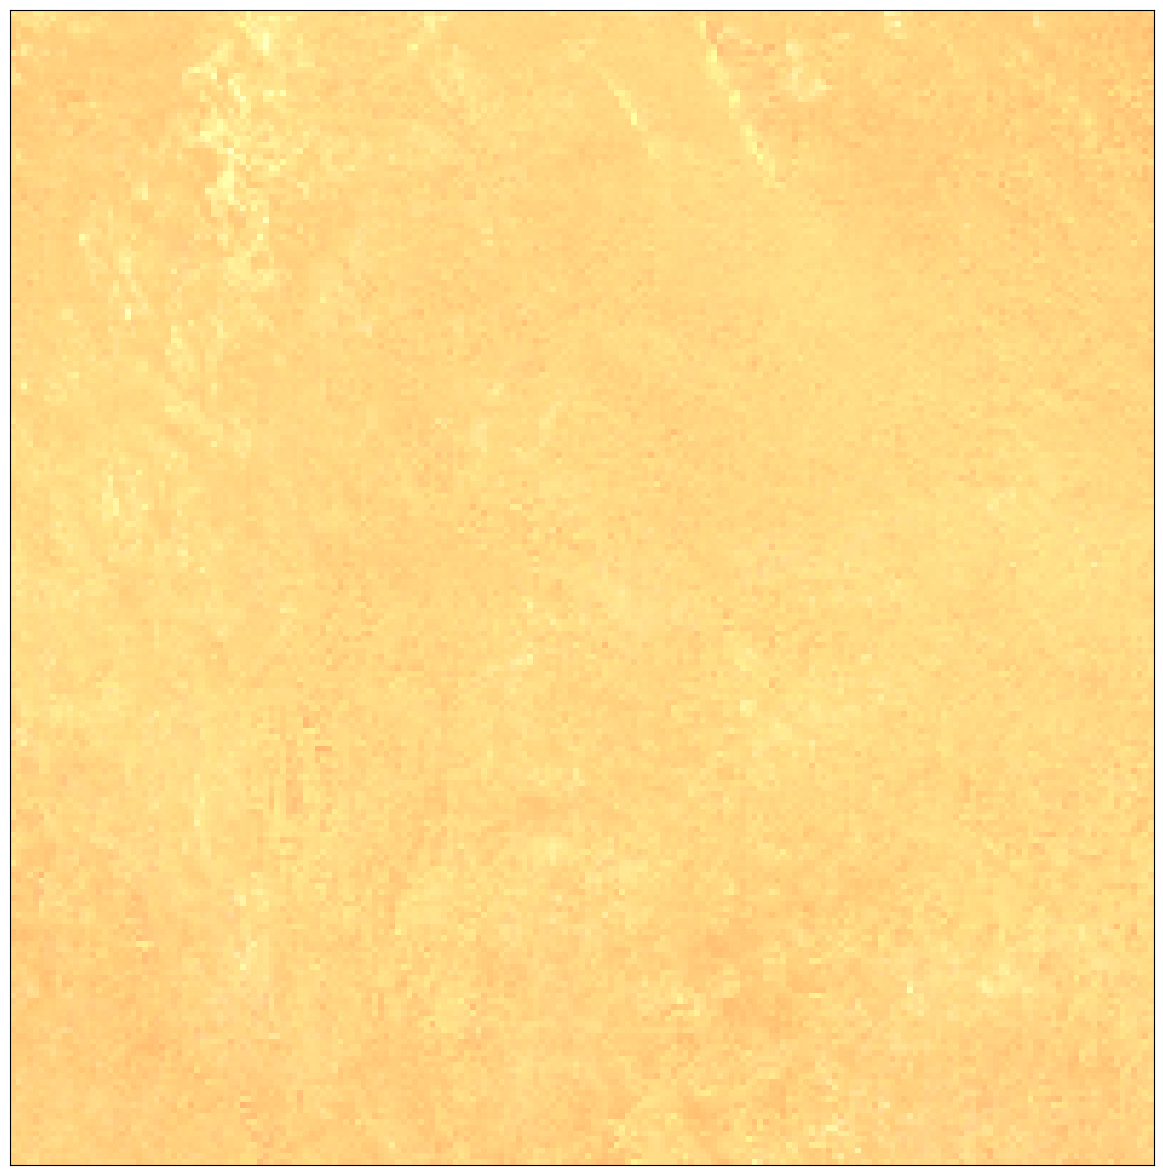

In [61]:
utils.plot_image(img, factor=1/255)